In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [58]:
dados = pd.read_csv("dadosacoes.csv")

In [59]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


<Axes: xlabel='nome ação', ylabel='valor de mercado R$ -(Bilhões)'>

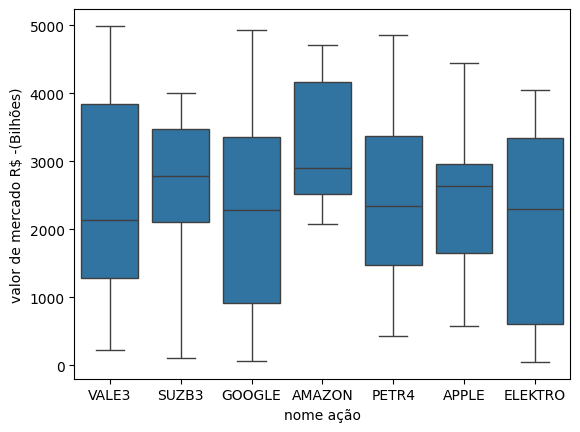

In [60]:
sns.boxplot(y='valor de mercado R$ -(Bilhões)',x='nome ação',data=dados)

In [61]:
dados.info()#verificando se tem numeros invalidos ou nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [62]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [64]:
#transformando o nome da ação em string ao inves de object
dados['nome ação'] = dados['nome ação'].astype(str)

In [65]:
dados = pd.get_dummies(dados,columns=['nome ação'],drop_first=True)

In [66]:
#Aplicando o KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados)

KMeans(n_clusters=4)

In [67]:
#Verificando a qualidade da inertia 
sse = kmeans.inertia_
print('SSE',sse)

SSE 13903226.03373016


In [68]:
#Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [69]:
plt.scatter(dados['nome ação'],dados['valor ação'],c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')

KeyError: 'nome ação'